혼동 행렬:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


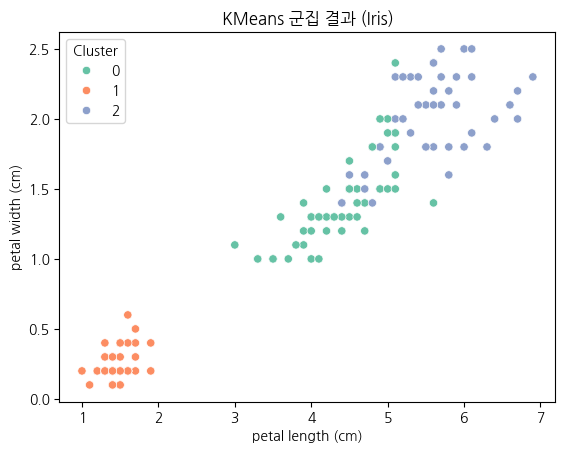

In [3]:
# 최소 주석 포함 간결한 실습 코드

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

# ✅ 한글 폰트 설정 (운영체제별 자동 감지)
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 데이터 불러오기
iris = load_iris()
X = iris.data  # 꽃받침, 꽃잎 정보
y = iris.target  # 실제 품종(정답)

# 2️⃣ 데이터 표준화 (스케일 맞추기)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ KMeans 학습 (3개의 군집)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# 4️⃣ 예측된 군집 레이블
labels = kmeans.labels_

# 5️⃣ 결과 비교 (혼동행렬)
cm = confusion_matrix(y, labels)
print("혼동 행렬:\n", cm)

# 6️⃣ 시각화 (꽃잎 길이 vs 너비)
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="Cluster", palette="Set2")
plt.title("KMeans 군집 결과 (Iris)")
plt.show()


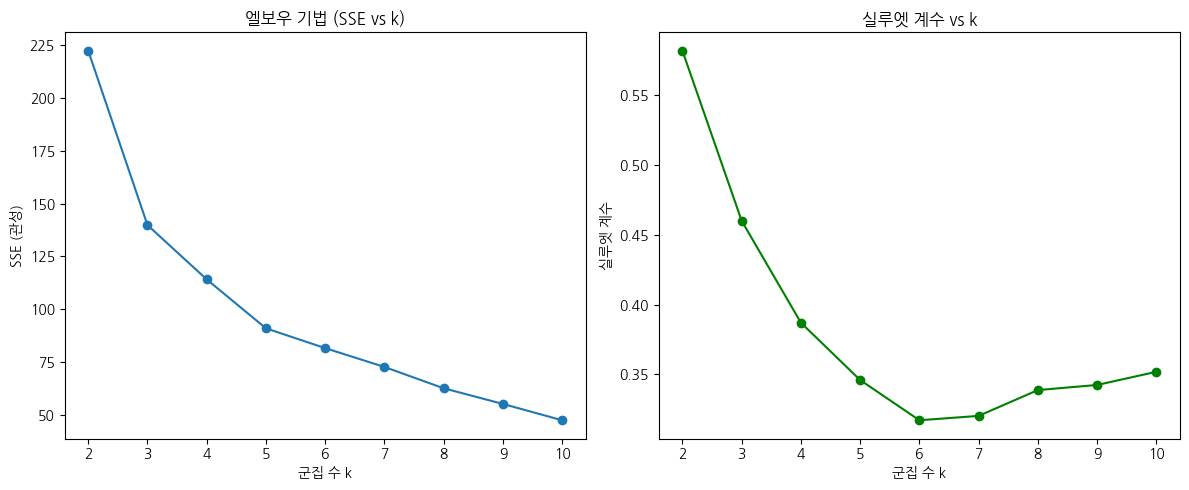

혼동 행렬:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


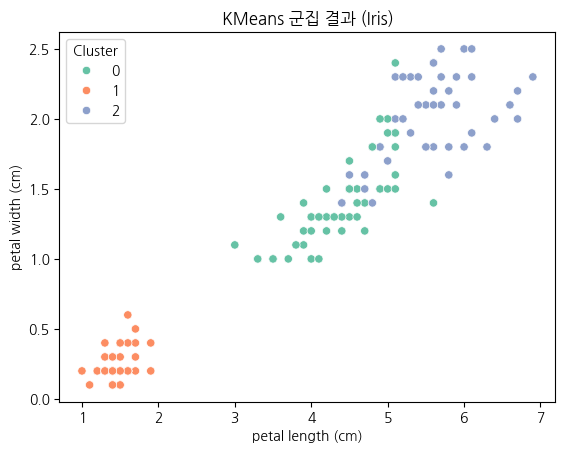

In [4]:
# KMeans + 최적 k 찾기(Elbow + Silhouette) 코드

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, silhouette_score
import pandas as pd

# ✅ 한글 폰트 설정 (운영체제별 자동 감지)
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target  # 실제 품종

# 2️⃣ 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ 엘보우(Elbow) 기법: SSE(관성) 계산
sse = []
silhouette_scores = []
k_range = range(2, 11)  # k=2~10 테스트

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # 관성(SSE)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 4️⃣ 엘보우 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title("엘보우 기법 (SSE vs k)")
plt.xlabel("군집 수 k")
plt.ylabel("SSE (관성)")
plt.xticks(k_range)

# 5️⃣ 실루엣 계수 그래프
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("실루엣 계수 vs k")
plt.xlabel("군집 수 k")
plt.ylabel("실루엣 계수")
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# 6️⃣ k=3으로 KMeans 학습 (Iris 품종이 3개라서)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels_

# 7️⃣ 혼동 행렬 출력
cm = confusion_matrix(y, labels)
print("혼동 행렬:\n", cm)

# 8️⃣ 시각화 (꽃잎 길이 vs 너비)
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="Cluster", palette="Set2")
plt.title("KMeans 군집 결과 (Iris)")
plt.show()


labels_ (첫 10개): [1 1 1 1 1 1 1 1 1 1]

군집 중심(원래 스케일):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              5.802             2.674              4.370             1.413
1              5.006             3.428              1.462             0.246
2              6.781             3.096              5.511             1.972

SSE(관성, inertia_): 139.82049635974982
반복 횟수(n_iter_): 4

새 샘플 군집 예측: [1 2]

혼동행렬(라벨 순서가 섞여도 대략적 유사도 파악용):
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


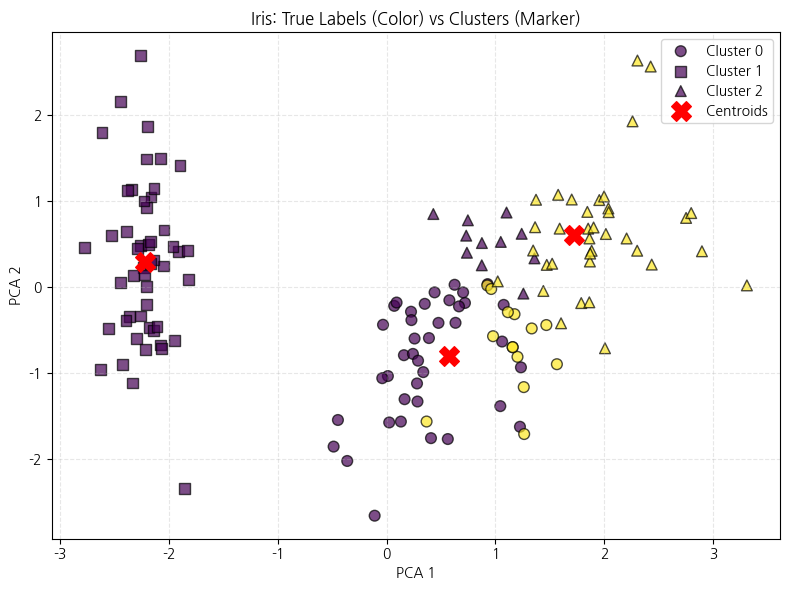

In [7]:
# ================== [1) 라이브러리] ==================
from sklearn.datasets import load_iris              # iris 데이터
from sklearn.preprocessing import StandardScaler    # 스케일링
from sklearn.cluster import KMeans                  # K-평균 군집
from sklearn.metrics import confusion_matrix        # 라벨 비교용(옵션)
import numpy as np
import pandas as pd

# ================== [2) 데이터 로드] ==================
iris = load_iris()
X = iris.data              # (150, 4) - sepal/petal length/width
y = iris.target            # (150,)    - 실제 품종(정답 라벨) [0,1,2]

# ================== [3) 스케일링] ==================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 거리기반 알고리즘 공정성↑

# ================== [4) 모델 설정 → 학습(fit)] ==================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 모델 "설정"
kmeans.fit(X_scaled)                                       # 모델 "학습"

# ================== [5) labels_: 각 샘플의 군집 번호] ==================
labels = kmeans.labels_            # (150,) 0~2 중 하나
print("labels_ (첫 10개):", labels[:10])

# ================== [6) cluster_centers_: 표준화 공간의 중심 좌표] ==================
centers_scaled = kmeans.cluster_centers_     # (3, 4) - 스케일된 공간의 중심
# 해석을 쉽게 하려면 원래 단위로 되돌리기(역변환)
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=iris.feature_names)
print("\n군집 중심(원래 스케일):")
print(centers_df.round(3))

# ================== [7) 기타 유용한 속성] ==================
print("\nSSE(관성, inertia_):", kmeans.inertia_)   # 군집 내 제곱합(작을수록 응집↑)
print("반복 횟수(n_iter_):", kmeans.n_iter_)       # 수렴까지 반복된 횟수

# ================== [8) 예측(predict): 새 샘플의 군집 번호] ==================
# 임의의 샘플 2개를 원래 단위로 만들고 → 스케일 → predict
new_samples = np.array([
    [5.0, 3.4, 1.6, 0.3],   # 작은 꽃잎(대개 setosa 근처)
    [6.7, 3.1, 5.6, 2.4],   # 큰 꽃잎(대개 virginica 근처)
])
new_scaled = scaler.transform(new_samples)
print("\n새 샘플 군집 예측:", kmeans.predict(new_scaled))

# ================== [9) (옵션) 비지도 결과 vs 정답 라벨 비교] ==================
# 주의: 군집 라벨은 임의 순서라 그대로 1:1 매칭되진 않음(순서만 다름)
cm = confusion_matrix(y, labels)
print("\n혼동행렬(라벨 순서가 섞여도 대략적 유사도 파악용):\n", cm)



# ================== [10) 시각화: 실제 라벨 색 + 군집 마커] ==================
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 10-1) PCA로 2차원 축소 (스케일된 공간 기준)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 10-2) 군집 중심(centroid)도 PCA 공간으로 변환
centers_pca = pca.transform(centers_scaled)

# 10-3) 마커 모양 리스트 (라벨 0,1,2 → 'o','s','^')
markers = ['o', 's', '^']

plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    # 현재 군집에 해당하는 샘플 인덱스
    idx = labels == cluster_id
    plt.scatter(
        X_pca[idx, 0], X_pca[idx, 1],
        c=y[idx],              # 실제 라벨을 색상으로
        cmap='viridis', 
        marker=markers[cluster_id],
        edgecolor='k', 
        s=60, alpha=0.7,
        label=f"Cluster {cluster_id}"
    )

# 중심점 표시
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)

plt.title("Iris: True Labels (Color) vs Clusters (Marker)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
